# Introduction

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import urllib.request
import re
from re import sub

import pandas as pd
import math
import requests 
import json
import numpy as np
from numpy import NaN


import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use(u'seaborn-paper')
plt.style.use('seaborn-white')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV

from bs4 import BeautifulSoup
from requests import get
from pandas import DataFrame
from tabulate import tabulate

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

import itertools
from itertools import chain
from IPython.core.display import HTML

import matplotlib.pyplot as plt
from decimal import Decimal

from sklearn.model_selection import ShuffleSplit
import seaborn as sb
import dtale
from datetime import datetime

%matplotlib inline
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
EJ14 = pd.read_csv('Endeligt data/EJ14.csv',delimiter=';',header=1, skiprows=1)

EJ14.drop(EJ14.columns[[0, 1]], axis = 1, inplace = True)
EJ14 = EJ14.drop([0, 1, 4]).T
EJ14 = EJ14.rename(columns=EJ14.iloc[0]).drop(EJ14.index[0:1])

EJ14['YM'] = pd.date_range(start='01/2006', end='03/2020', freq='M')


In [3]:

EJ14['One-family houses, All of Denmark'] = EJ14['One-family houses'].iloc[:,0] * 100 / EJ14.loc['2014M01', ['One-family houses']][0:1].iloc[0]
EJ14['Owner-occupied flats, All of Denmark'] = EJ14['Owner-occupied flats, total'].iloc[:,0] * 100 / EJ14.loc['2014M01', ['Owner-occupied flats, total']][0:1].iloc[0]

EJ14['One-family houses, Capital Region of Denmark'] = EJ14['One-family houses'].iloc[:,1] * 100 / EJ14.loc['2014M01', ['One-family houses']][1:2].iloc[0]
EJ14['Owner-occupied flats, Capital Region of Denmark'] = EJ14['Owner-occupied flats, total'].iloc[:,1] * 100 / EJ14.loc['2014M01', ['Owner-occupied flats, total']][1:2].iloc[0]



In [4]:
EJ14
EJ14.loc['2014M01']

One-family houses                                                 88.1
Owner-occupied flats, total                                       89.2
One-family houses                                                 82.3
Owner-occupied flats, total                                       87.5
YM                                                 2014-01-31 00:00:00
One-family houses, All of Denmark                                  100
Owner-occupied flats, All of Denmark                               100
One-family houses, Capital Region of Denmark                       100
Owner-occupied flats, Capital Region of Denmark                    100
Name: 2014M01, dtype: object

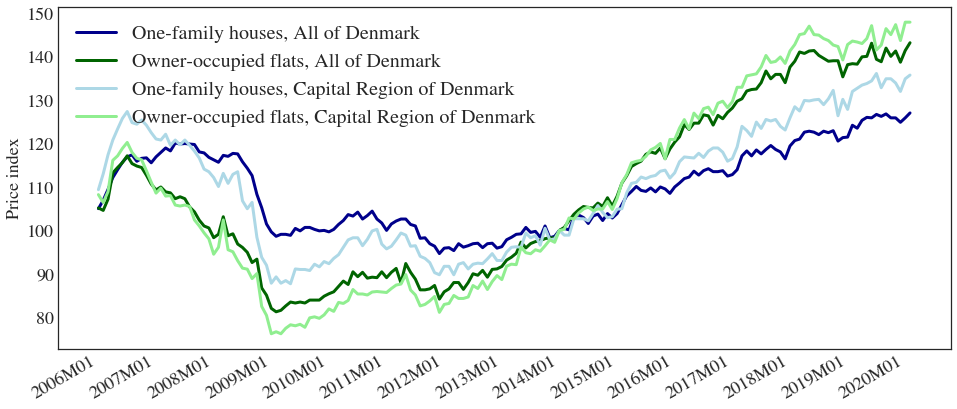

In [7]:

plt.rcParams["figure.figsize"] = (16,7)

fig, ax = plt.subplots()

# Plot data
plt.plot(EJ14['One-family houses, All of Denmark'], c ='darkblue', linewidth=3, label='One-family houses, All of Denmark');
plt.plot(EJ14['Owner-occupied flats, All of Denmark'], c ='darkgreen', linewidth=3, label='Owner-occupied flats, All of Denmark');

plt.plot(EJ14['One-family houses, Capital Region of Denmark'], c ='lightblue', linewidth=3, label='One-family houses, Capital Region of Denmark');
plt.plot(EJ14['Owner-occupied flats, Capital Region of Denmark'], c ='lightgreen', linewidth=3, label='Owner-occupied flats, Capital Region of Denmark');


# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Price index')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%12 != 0:
        tick.label1.set_visible(False)

plt.show()
